In [1]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import correlate

In [55]:
random_binary_list

array([-1, -1,  1,  1, -1,  1, -1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1,
        1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1,
        1,  1,  1,  1, -1,  1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1,
        1,  1, -1,  1,  1,  1, -1,  1, -1, -1,  1, -1, -1, -1, -1,  1,  1,
       -1, -1, -1,  1, -1, -1,  1, -1,  1,  1, -1,  1, -1, -1, -1, -1,  1,
        1, -1, -1,  1,  1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1])

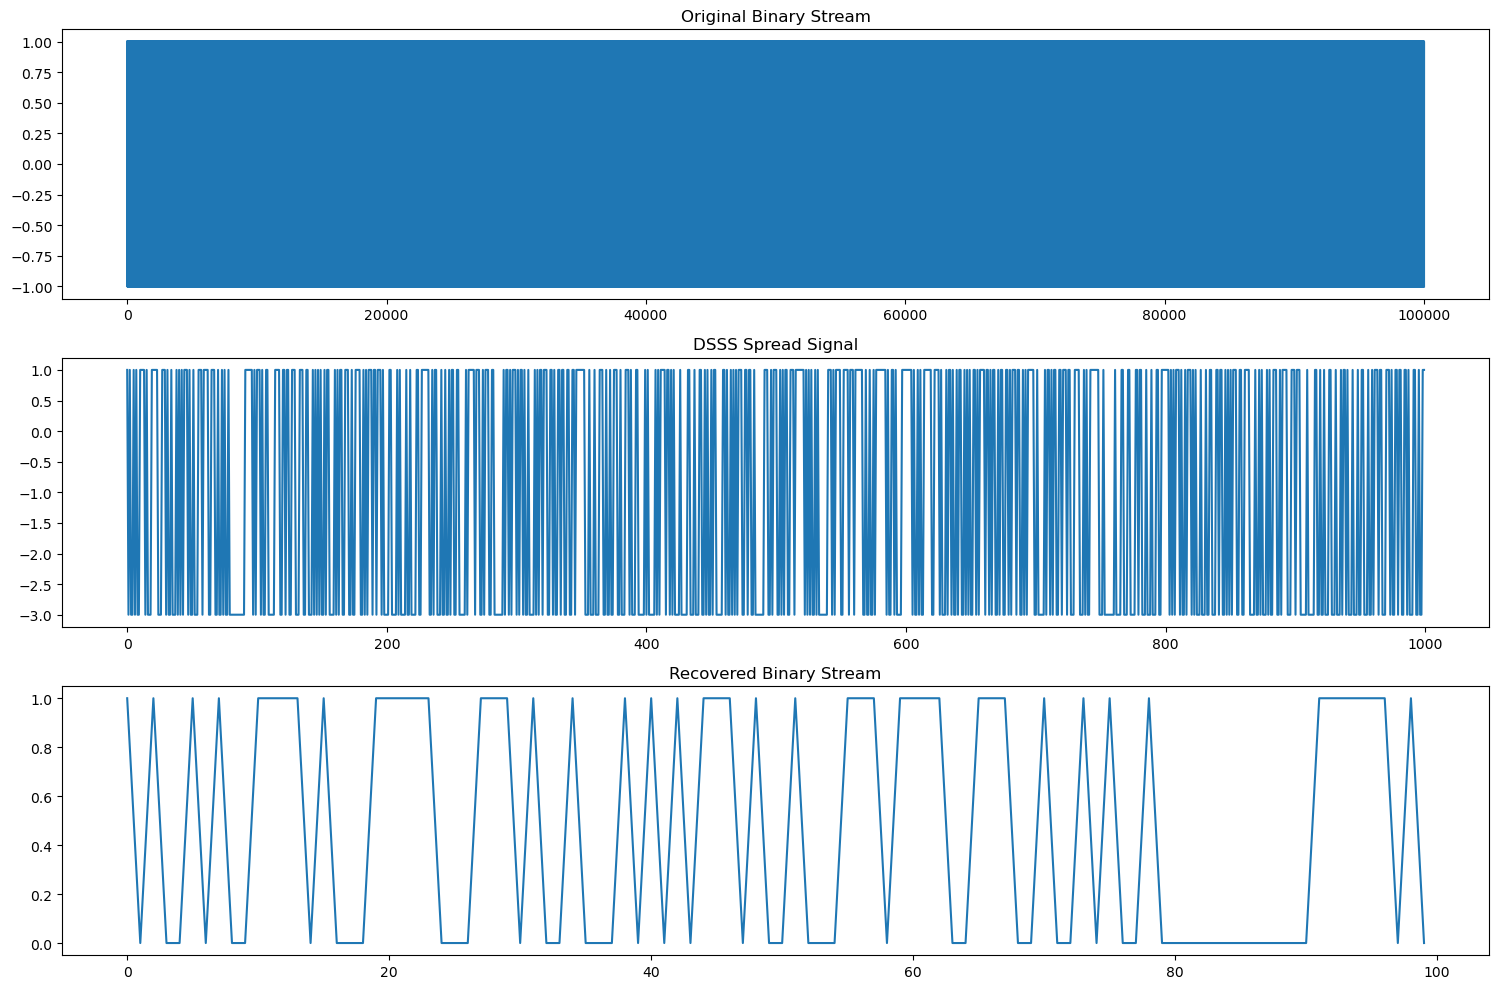

In [70]:
random_binary_list = np.random.choice([-1, 1], size=100000)


# Function to read binary file
def read_binary_file(file_path):
    with open(file_path, 'rb') as file:
        binary_data = file.read()
    return np.unpackbits(np.frombuffer(binary_data, dtype=np.uint8))

# Function to write binary file
def write_binary_file(file_path, binary_data):
    byte_data = np.packbits(binary_data)
    with open(file_path, 'wb') as file:
        file.write(byte_data)

# Load binary file and convert to binary stream
binary_stream = read_binary_file(file_path)  # Replace with your binary file

# Parameters
chip_rate = 1  # Number of chips per binary bit
sample_rate = 48000  # Sample rate for the signals

# Generate PN code
pn_code = np.random.choice([-1,1], size=chip_rate)

# Function to spread the binary stream
def spread_signal(binary_stream, pn_code, chip_rate):
    spread_signal = np.repeat(binary_stream * 2 - 1, chip_rate) * np.tile(pn_code, len(binary_stream))
    return spread_signal

# Function to despread the received signal
def despread_signal(received_signal, pn_code, chip_rate):
    despread_signal = []
    for i in range(0, len(received_signal), chip_rate):
        chunk = received_signal[i:i + chip_rate]
        despread_value = np.dot(chunk, pn_code)
        bit = 1 if despread_value > 0 else 0
        despread_signal.append(bit)
    return np.array(despread_signal, dtype=np.uint8)
# Spread the binary stream
spread_signal = spread_signal(random_binary_list, pn_code, chip_rate)

# Simulate received signal (assume perfect transmission for simplicity)
received_signal = spread_signal

# Despread the received signal
recovered_binary_stream = despread_signal(received_signal, pn_code, chip_rate)

# Save the recovered binary stream to a file
# write_binary_file('recovered_binary_file.m4a', recovered_binary_stream)

# Plot the original, spread, and recovered signals
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(random_binary_list)
plt.title('Original Binary Stream')

plt.subplot(3, 1, 2)
plt.plot(spread_signal[:1000])
plt.title('DSSS Spread Signal')

plt.subplot(3, 1, 3)
plt.plot(recovered_binary_stream[:100])
plt.title('Recovered Binary Stream')

plt.tight_layout()
plt.show()



-54

In [71]:
sum(((random_binary_list+1)//2)-recovered_binary_stream)

0

In [63]:
recovered_binary_stream

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0], dtype=uint8)